In [1]:
!pip install yfinance

import yfinance as yf

# Define the stock tickers 
ticker = ["^GSPC", "GC=F", "VNQ"]


# Fetch historical market data (e.g., last 5 years of daily prices)
stock_data = yf.download(ticker, start="2019-01-01", end="2024-12-31")["Close"]

# Display the first few rows
print(stock_data.head())

# Save the data to a CSV file
stock_data.to_csv("stock_data.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed

Ticker             GC=F        VNQ        ^GSPC
Date                                           
2019-01-02  1281.000000  57.731628  2510.030029
2019-01-03  1291.800049  58.135239  2447.889893
2019-01-04  1282.699951  58.815838  2531.939941
2019-01-07  1286.800049  59.393547  2549.689941
2019-01-08  1283.199951  60.620209  2574.409912


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Calculate the daily log returns
log_returns = np.log(stock_data / stock_data.shift(1))

# Drop missing value created from calculation
log_returns = log_returns.dropna()

# Calculate summary statistics
mean_returns = log_returns.mean()  # Daily mean return
volatility = log_returns.std()  # Daily volatility
skewness = log_returns.apply(skew)
kurt = log_returns.apply(kurtosis)

# Create a DataFrame with the summary statistics
summary_stats = pd.DataFrame({
    'Mean Return': mean_returns,
    'Volatility': volatility,
    'Skewness': skewness,
    'Kurtosis': kurt
})

# Print the summary statistics
print(summary_stats)

# Save summary statistics to CSV for easy reference
summary_stats.to_csv("summary_stats.csv")

        Mean Return  Volatility  Skewness   Kurtosis
Ticker                                              
GC=F       0.000471    0.009820 -0.298258   3.827725
VNQ        0.000275    0.015166 -1.666478  24.360013
^GSPC      0.000568    0.012738 -0.853157  15.204581


In [7]:
# Check for missing data in the log returns
print(stock_data.isna().sum())

Ticker
GC=F     0
VNQ      0
^GSPC    0
dtype: int64


In [8]:
PortValue = 1000000
w = np.array([0.3, 0.2, 0.5])
m = np.array([0.00471, 0.00275, 0.00568])
V = log_returns.cov()

In [9]:
C = np.linalg.cholesky(V)
s = np.diag(V)
T = 1
interval_size = T / 250
num_intervals = int(T / interval_size)
num_simulations = 100
P = np.zeros((num_intervals + 1, num_simulations))

In [10]:
X = np.random.normal(0, 1, (num_intervals, 3))

Y = X @ C.T * np.sqrt(interval_size) + (m - s / 2) * interval_size

Z = Y @ w

P[0, :] = PortValue
for t in range(num_intervals):
    P[t + 1, 0] = P[t, 0] * np.exp(Z[t])
    
P[0, :] = PortValue

for i in range(num_simulations):
    X = np.random.normal(0, 1, (num_intervals, 3))
    Y = X @ C.T * np.sqrt(interval_size) + (m - s / 2) * interval_size
    Z = Y @ w
    
    for t in range(num_intervals):
        P[t + 1, i] = P[t, i] * np.exp(Z[t])

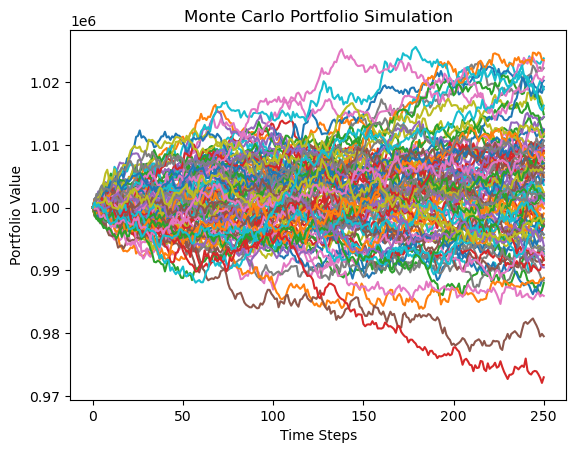

Value at Risk (VaR 10%): 8207.23


In [11]:
plt.plot(P)
plt.xlabel("Time Steps")
plt.ylabel("Portfolio Value")
plt.title("Monte Carlo Portfolio Simulation")
plt.show()

VaR = -(np.quantile(P[-1,:], 0.1) - PortValue)
print(f"Value at Risk (VaR 10%): {VaR:.2f}")


In [15]:
num_simulations = 1000
P = np.zeros((num_intervals + 1, num_simulations))

In [16]:
X = np.random.normal(0, 1, (num_intervals, 3))

Y = X @ C.T * np.sqrt(interval_size) + (m - s / 2) * interval_size

Z = Y @ w

P[0, :] = PortValue
for t in range(num_intervals):
    P[t + 1, 0] = P[t, 0] * np.exp(Z[t])
    
P[0, :] = PortValue

for i in range(num_simulations):
    X = np.random.normal(0, 1, (num_intervals, 3))
    Y = X @ C.T * np.sqrt(interval_size) + (m - s / 2) * interval_size
    Z = Y @ w
    
    for t in range(num_intervals):
        P[t + 1, i] = P[t, i] * np.exp(Z[t])

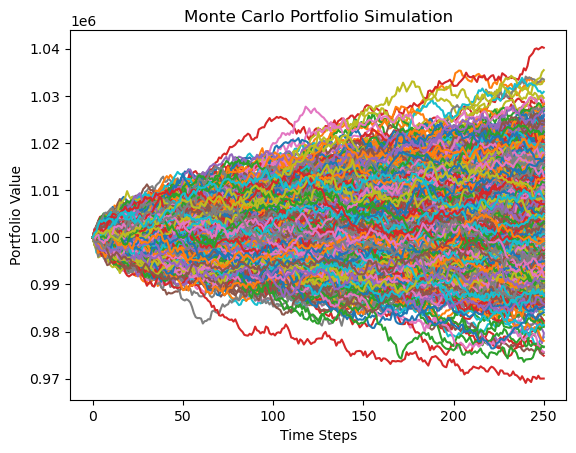

Value at Risk (VaR 10%): 8581.49


In [17]:
plt.plot(P)
plt.xlabel("Time Steps")
plt.ylabel("Portfolio Value")
plt.title("Monte Carlo Portfolio Simulation")
plt.show()

VaR = -(np.quantile(P[-1,:], 0.1) - PortValue)
print(f"Value at Risk (VaR 10%): {VaR:.2f}")

In [18]:
num_simulations = 10000
P = np.zeros((num_intervals + 1, num_simulations))

In [19]:
X = np.random.normal(0, 1, (num_intervals, 3))

Y = X @ C.T * np.sqrt(interval_size) + (m - s / 2) * interval_size

Z = Y @ w

P[0, :] = PortValue
for t in range(num_intervals):
    P[t + 1, 0] = P[t, 0] * np.exp(Z[t])
    
P[0, :] = PortValue

for i in range(num_simulations):
    X = np.random.normal(0, 1, (num_intervals, 3))
    Y = X @ C.T * np.sqrt(interval_size) + (m - s / 2) * interval_size
    Z = Y @ w
    
    for t in range(num_intervals):
        P[t + 1, i] = P[t, i] * np.exp(Z[t])

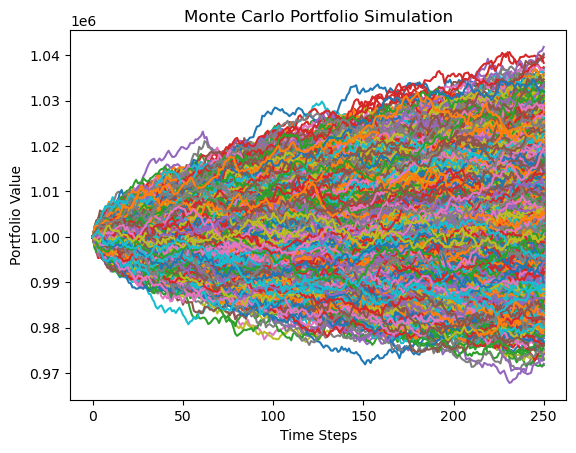

Value at Risk (VaR 10%): 7467.49


In [20]:
plt.plot(P)
plt.xlabel("Time Steps")
plt.ylabel("Portfolio Value")
plt.title("Monte Carlo Portfolio Simulation")
plt.show()

VaR = -(np.quantile(P[-1,:], 0.1) - PortValue)
print(f"Value at Risk (VaR 10%): {VaR:.2f}")

In [21]:
num_simulations = 100000
P = np.zeros((num_intervals + 1, num_simulations))

In [22]:
X = np.random.normal(0, 1, (num_intervals, 3))

Y = X @ C.T * np.sqrt(interval_size) + (m - s / 2) * interval_size

Z = Y @ w

P[0, :] = PortValue
for t in range(num_intervals):
    P[t + 1, 0] = P[t, 0] * np.exp(Z[t])
    
P[0, :] = PortValue

for i in range(num_simulations):
    X = np.random.normal(0, 1, (num_intervals, 3))
    Y = X @ C.T * np.sqrt(interval_size) + (m - s / 2) * interval_size
    Z = Y @ w
    
    for t in range(num_intervals):
        P[t + 1, i] = P[t, i] * np.exp(Z[t])

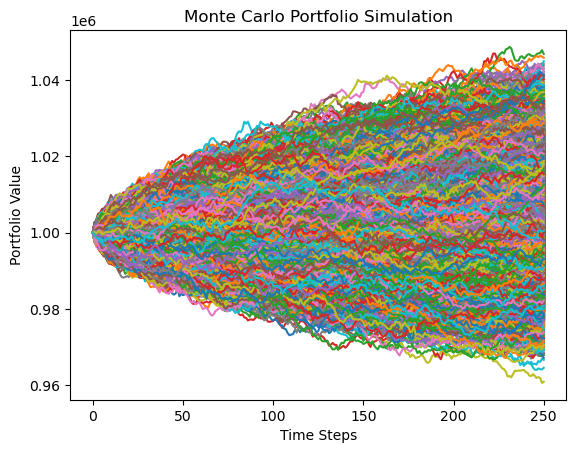

Value at Risk (VaR 10%): 7721.85


In [23]:
plt.plot(P)
plt.xlabel("Time Steps")
plt.ylabel("Portfolio Value")
plt.title("Monte Carlo Portfolio Simulation")
plt.show()

VaR = -(np.quantile(P[-1,:], 0.1) - PortValue)
print(f"Value at Risk (VaR 10%): {VaR:.2f}")

In [24]:
port = 0.5 * log_returns['^GSPC'] + 0.2 * log_returns['VNQ'] + 0.3 * log_returns['GC=F']
port

Date
2019-01-03   -0.008622
2019-01-04    0.017087
2019-01-07    0.006405
2019-01-08    0.008072
2019-01-09    0.003180
                ...   
2024-12-23    0.002534
2024-12-24    0.007698
2024-12-26    0.002478
2024-12-27   -0.010042
2024-12-30   -0.007649
Length: 1508, dtype: float64

In [25]:
type(port)

pandas.core.series.Series

In [26]:
!pip install arch
from arch import arch_model
# Convert to a pandas Series
returns_series = log_returns.iloc[:, 0]

# Fit a GARCH(1,1) model
# By default, arch_model assumes a constant mean and a GARCH(1,1) for volatility
model = arch_model(returns_series, vol='GARCH', p=1, q=1, mean='Constant', dist='normal')

# stimate the model parameters
res = model.fit(disp='off')  # disp='off' to suppress optimization output

# Print the results
res.summary()

/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.636e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   GC=F   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4890.72
Distribution:                  Normal   AIC:                          -9773.45
Method:            Maximum Likelihood   BIC:                          -9752.17
                                        No. Observations:                 1508
Date:                Fri, Apr 18 2025   Df Residuals:                     1507
Time:                        11:43:48   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.0254e-04  2.272e-04      1.331      0.183 [-1.428e-04,7.479e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.9272e-06  2.658e-11  7.250e+04      0.000 [1.927e-06,1.927e-06]
alpha[1]       0.0500  1.570e-02      3.185  1.447e-03 [1.923e-02,8.077e-02]
beta[1]        0.9300  1.444e-02     64.420      0.000     [  0.902,  0.958]
============================================================================

Covariance estimator: robust
"""

In [27]:
import seaborn as sns
import os

In [28]:
data = pd.read_csv('view.csv', index_col=0)
data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,Class
0,2.066860,-0.020046,-1.767555,0.733844,0.273100,-0.759437,0.030152,-0.196861,0.970792,-0.436721,...,0.134090,-0.044286,-0.711986,0.196494,0.499970,-0.038726,-0.045336,-0.181653,0.674808,0
1,-3.174988,2.565829,-1.166506,-2.662460,-0.563333,-1.758946,0.158992,1.060015,0.846993,0.084840,...,-0.933422,0.196827,-0.132664,0.321662,0.410302,0.403295,0.305377,-0.293440,0.035762,0
2,-1.358615,-0.694513,0.663246,-0.918161,2.429012,-0.748662,-0.137744,0.109871,1.414226,-1.288576,...,0.351336,-0.169299,0.187691,0.344757,0.024591,0.007354,0.141657,-0.261301,0.151694,0
3,-10.290219,-2.815842,-3.015308,0.670187,-0.323126,-0.012862,2.315149,-1.951854,2.914832,3.560149,...,-1.293607,-1.589622,0.994588,-1.024713,-0.792314,-3.596743,-2.944840,1.928596,0.525946,0
4,2.066360,-1.862311,-0.043096,-1.562647,-1.844436,0.263880,-1.849429,0.190699,-0.890452,1.594112,...,0.208154,0.313158,0.745770,-0.576860,-0.309670,0.047811,-0.020008,0.825683,0.416370,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.179733,-1.280758,2.656996,0.869706,1.303247,0.607617,-0.645940,0.785346,0.434719,-1.006206,...,-0.564053,0.285385,-0.326247,0.423785,-0.582267,0.035910,0.091325,0.936072,-0.157415,0
9996,-0.934501,0.986131,1.355967,-0.736684,0.161198,0.679856,-0.042052,0.767234,-0.263725,-1.076282,...,-0.561473,-0.261469,0.044882,0.387627,-0.426890,-0.060354,0.002852,-0.237546,0.944231,0
9997,-1.208527,1.839633,-0.394665,0.685308,1.690406,0.038521,1.430344,-0.011120,-0.798887,-0.041243,...,0.055274,-0.582994,0.098954,1.247288,-0.245183,-0.145467,-0.341344,-0.097394,0.380855,0
9998,-2.232292,-0.817801,2.946485,4.883228,0.755942,0.194946,-1.715312,0.738208,-0.433090,1.944281,...,0.408406,-0.060580,-0.156623,-0.000038,0.590705,0.441610,0.487050,0.355481,0.477238,0


In [29]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   10000 non-null  float64
 1   feature_2   10000 non-null  float64
 2   feature_3   10000 non-null  float64
 3   feature_4   10000 non-null  float64
 4   feature_5   10000 non-null  float64
 5   feature_6   10000 non-null  float64
 6   feature_7   10000 non-null  float64
 7   feature_8   10000 non-null  float64
 8   feature_9   10000 non-null  float64
 9   feature_10  10000 non-null  float64
 10  feature_11  10000 non-null  float64
 11  feature_12  10000 non-null  float64
 12  feature_13  10000 non-null  float64
 13  feature_14  10000 non-null  float64
 14  feature_15  10000 non-null  float64
 15  feature_16  10000 non-null  float64
 16  feature_17  10000 non-null  float64
 17  feature_18  10000 non-null  float64
 18  feature_19  10000 non-null  float64
 19  feature_20  10000 non-null

<AxesSubplot:xlabel='feature_3', ylabel='feature_17'>

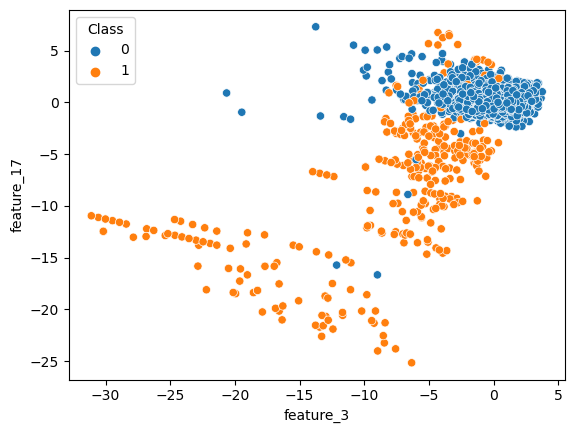

In [30]:
sns.scatterplot(x='feature_3', y='feature_17', data=data, hue='Class')

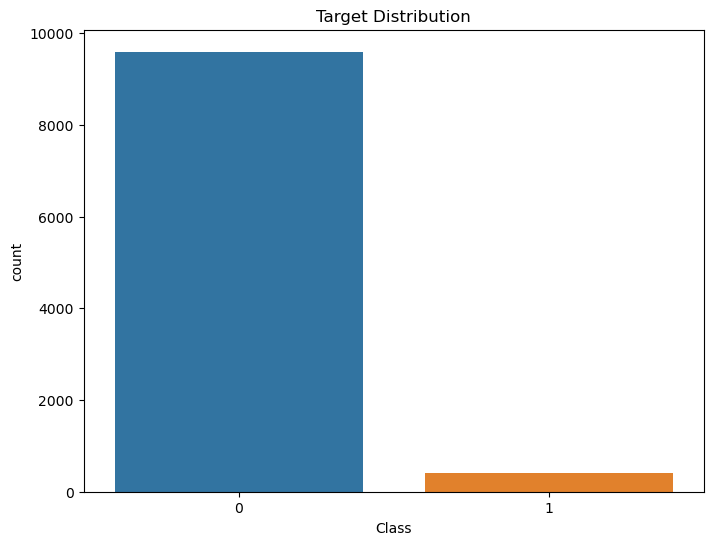

In [31]:
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.countplot(x='Class', data=data)
plt.title('Target Distribution')
plt.show()

The dataset is highly imbalanced. the accuracy metric is not a gfood evaluation metric.

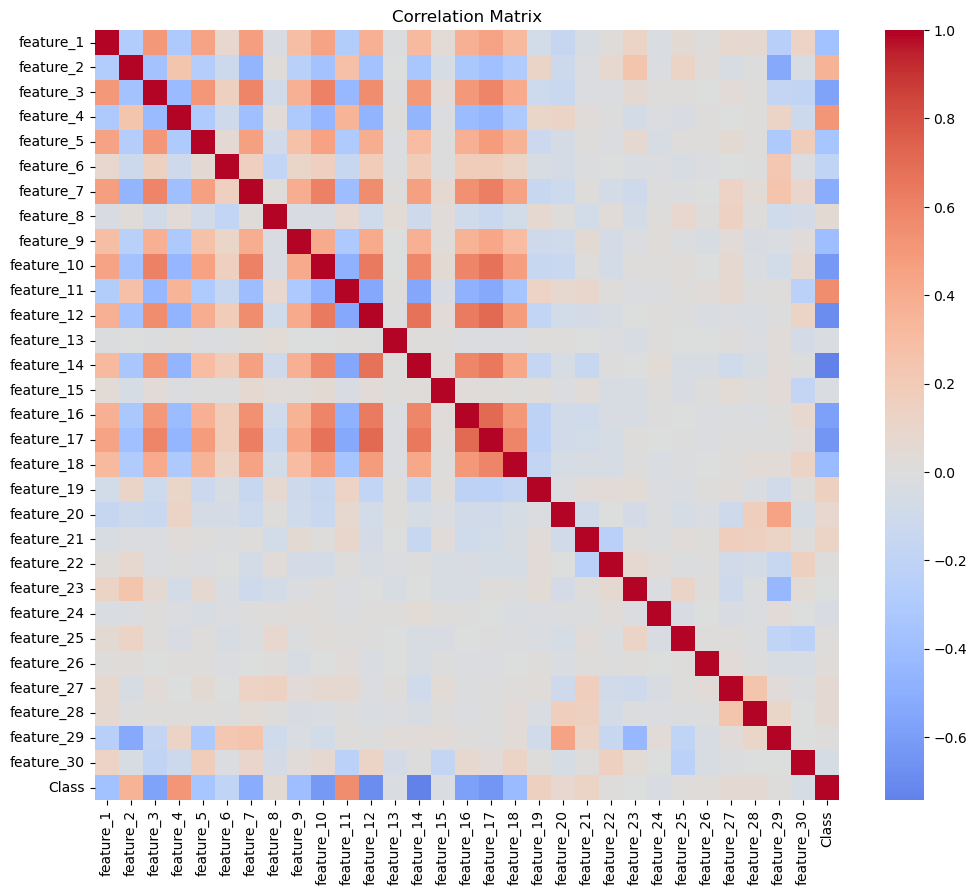

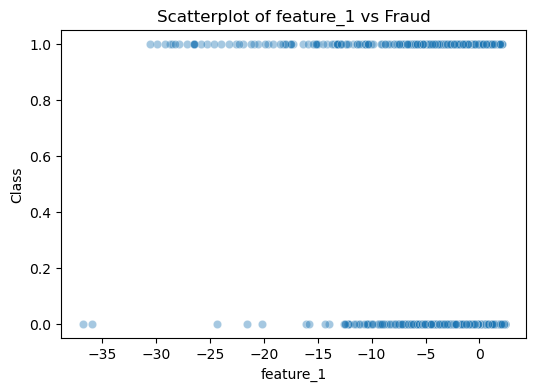

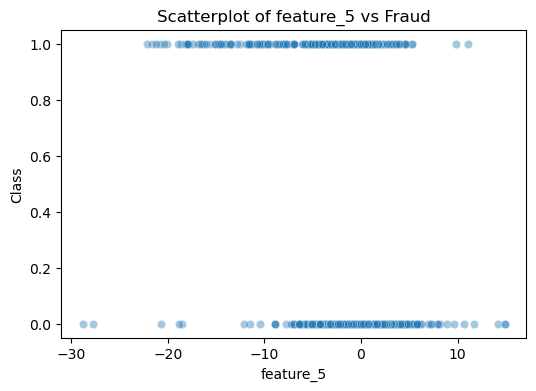

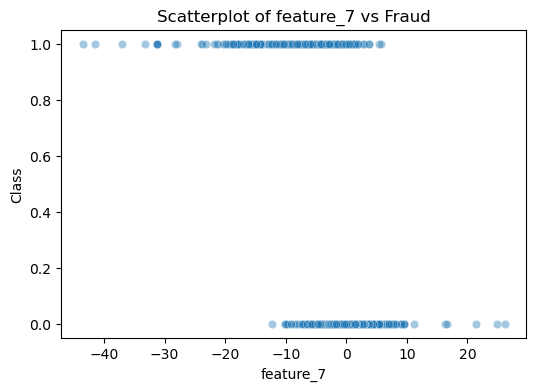

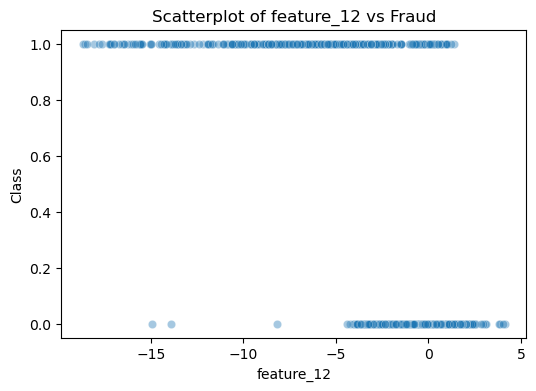

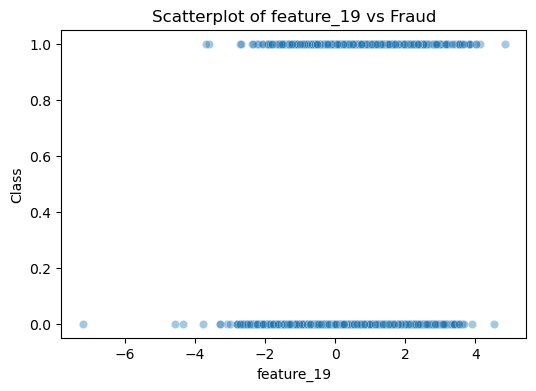


Top 10 Features with Largest Mean Difference Between Classes:
Class              0         1  Difference
feature_4   0.012559  4.620845    4.608287
feature_11 -0.011721  3.828734    3.840455
feature_2  -0.016641  3.740112    3.756754
feature_21  0.013927  0.684797    0.670870
feature_19  0.014156  0.683812    0.669656
feature_8   0.007826  0.454429    0.446603
feature_20  0.002511  0.396400    0.393889
feature_29  0.996959  1.386658    0.389699
feature_27  0.000691  0.135210    0.134519
feature_28 -0.002744  0.079569    0.082313


In [54]:
# Correlation matrix for initial pattern insight
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

# Scatterplots for a few important features vs target
# You can change features below based on feature importance later
important_features = ['feature_1', 'feature_5', 'feature_7', 'feature_12', 'feature_19']  # replace with actual names

for feature in important_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=feature, y='Class', alpha=0.4)
    plt.title(f'Scatterplot of {feature} vs Fraud')
    plt.show()

# Optional: group means to explore value patterns
group_means = data.groupby('Class').mean().T
group_means['Difference'] = group_means[1] - group_means[0]
group_means = group_means.sort_values(by='Difference', ascending=False)

print("\nTop 10 Features with Largest Mean Difference Between Classes:")
print(group_means.head(10))

In [32]:
# Extract the feature matrix
X = data.drop('Class', axis=1).values

# Extract the target
Y = data['Class'].values

In [33]:
# Shape of X
print("Shape of X:", X.shape)  # Expected Output: (10000, 30)

Shape of X: (10000, 30)


In [34]:
# Shape of Y
print("Shape of Y:", Y.shape)  # Expected Output: (10000, 1)

Shape of Y: (10000,)


In [35]:
# Import the module
from sklearn.model_selection import train_test_split

# Split the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [36]:
# Shape of X_train
print("Training set shape (X_train):", X_train.shape)  # Expected shape: (7000, 30)


Training set shape (X_train): (7000, 30)


In [37]:
# Shape of y_train
print("Test set shape (X_test):", X_test.shape)         # Expected shape: (3000, 30)

Test set shape (X_test): (3000, 30)


In [38]:
# Shape of X_test  
print("Training target shape (Y_train):", Y_train.shape) # Expected shape: (7000, 1)

Training target shape (Y_train): (7000,)


In [39]:
# Shape of y_test
print("Test target shape (Y_test):", Y_test.shape)       # Expected shape: (3000, 1)

Test target shape (Y_test): (3000,)


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Calculating y_hat
y_hat_rf = rf.predict(X_test)

accuracy = accuracy_score(Y_test, y_hat_rf)
print("Accuracy:", accuracy)
print("Shape of y_hat:", y_hat_rf.shape)
print("First 10 predictions:", y_hat_rf[:10])

Accuracy: 0.995
Shape of y_hat: (3000,)
First 10 predictions: [0 0 0 0 0 0 0 0 0 0]


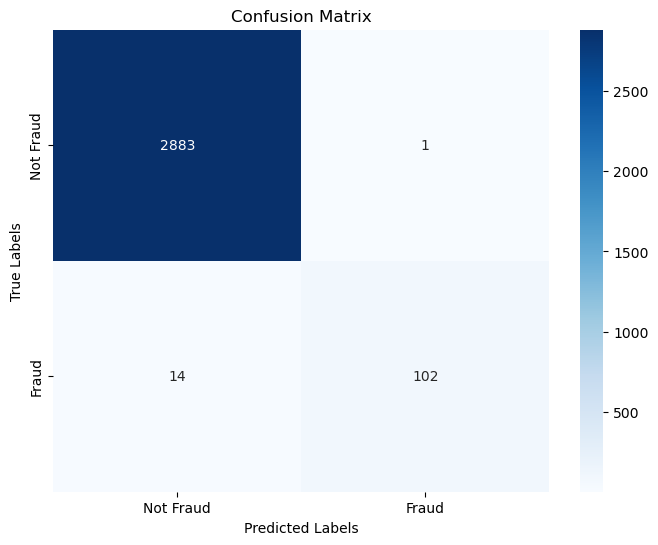

In [43]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, y_hat_rf)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# print the classification report
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(Y_test, y_hat_rf, target_names=['Not Fraud', 'Fraud'])

print(report)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      2884
       Fraud       0.99      0.88      0.93       116

    accuracy                           0.99      3000
   macro avg       0.99      0.94      0.96      3000
weighted avg       0.99      0.99      0.99      3000



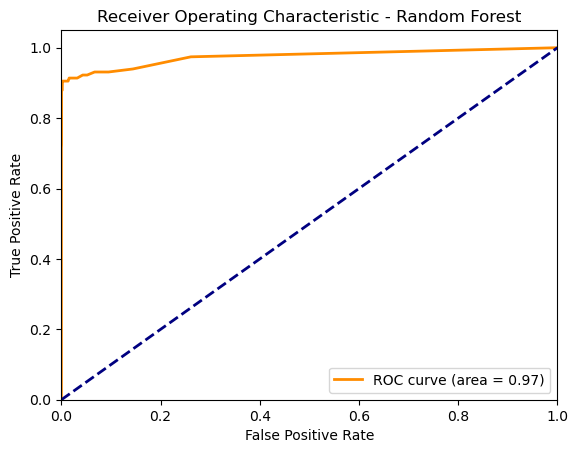

In [49]:
# Get predicted probabilities for the positive class
probabilities = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds_roc = roc_curve(Y_test, probabilities)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()